# Procesos autorregresivos (AR)

Los procesos autorregresivos son procesos estacionarios que nos dicen que en una serie temporal el valor en un instante dado depende de los valores de los p instantes anteriores.

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

### Creamos un proceso AR de Orden 1

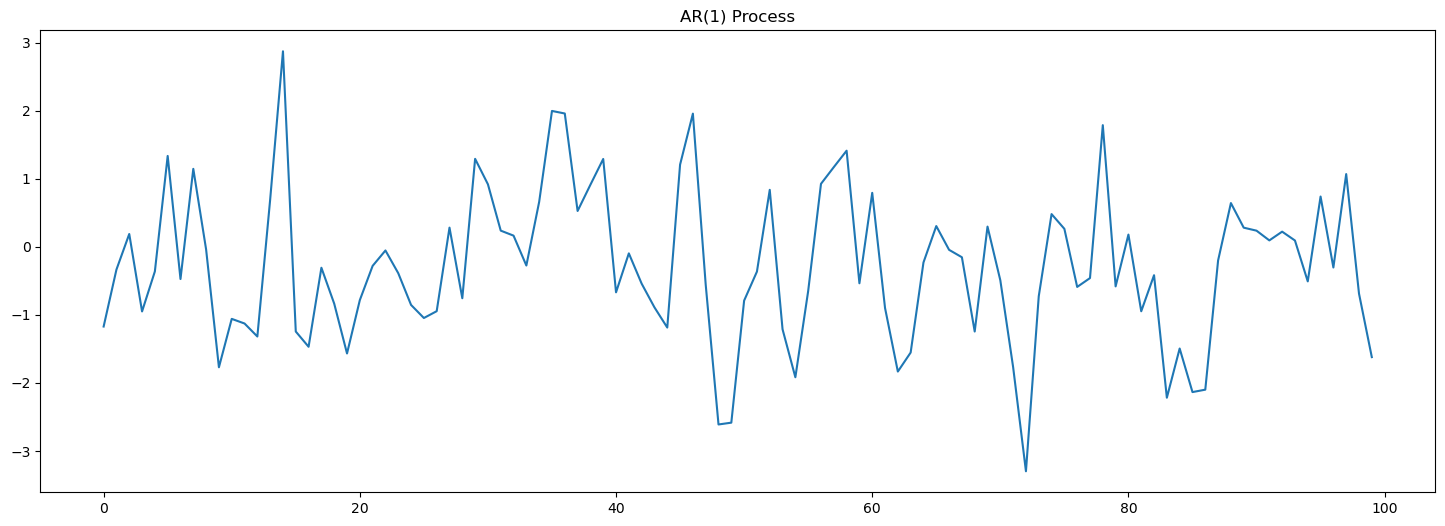

In [2]:
# Creamos un proceso autorregresivo de orden 1

def ar1(rho = .9, n = 100, init = 0):
    time_series = [init]
    error = np.random.randn(n)
    for period in range(n):
        time_series.append(error[period] + rho*time_series[-1])
    return pd.Series(time_series[1:], index = range(n))

p = 1
N_SAMPLES = 100

AR1 = ar1(rho = .5, n = N_SAMPLES)

# Visualizamos el proceso autorregresivo de orden 1
plt.figure(figsize=[18, 6])
plt.plot(AR1)
plt.title("AR(1) Process")
plt.show()

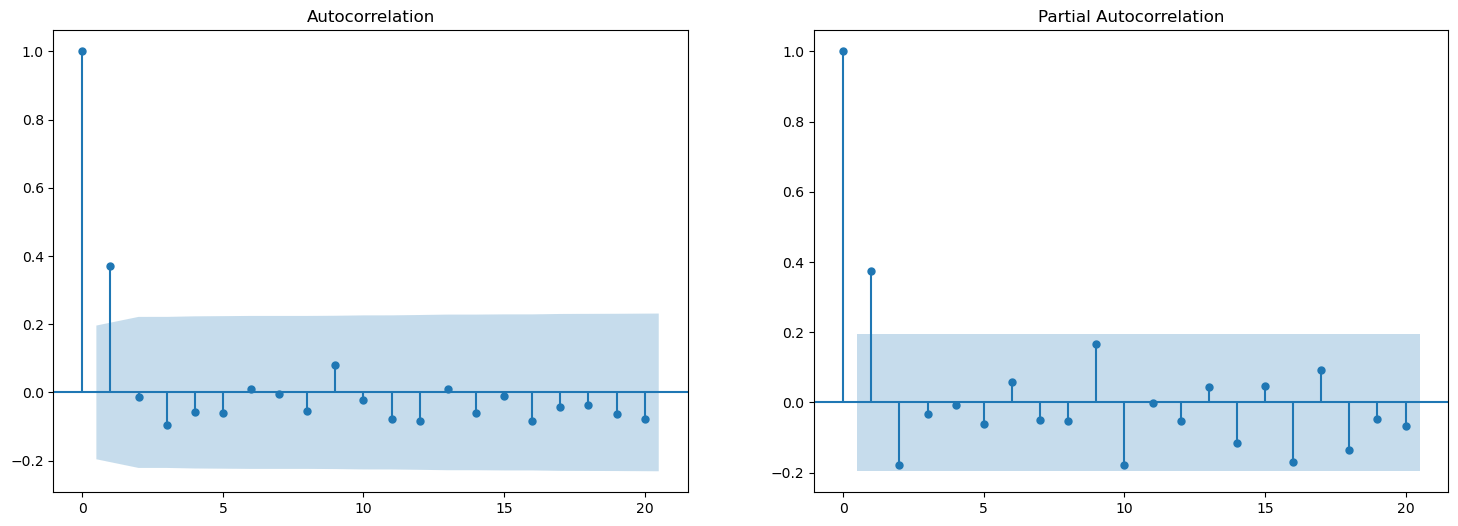

In [3]:
# Visualizamos las autocorrelaciones
fig, ax = plt.subplots(1,2,figsize=(18,6))
plot_acf(AR1, lags=20, ax=ax[0])
plot_pacf(AR1, lags=20, ax=ax[1])
plt.show()

In [4]:
# Vemos en la autocorrelacion parcial el orden interesante
pacf_coef = pacf(AR1)
print(pacf_coef)

[ 1.          0.37509851 -0.17883976 -0.03258724 -0.00740834 -0.06075303
  0.05805881 -0.05119559 -0.05413498  0.1658218  -0.17710041 -0.00165036
 -0.05148189  0.04445793 -0.11657956  0.04765283 -0.17048602  0.09276991
 -0.1355532  -0.04711102 -0.06762459  0.15390152  0.19921659 -0.00145308
  0.00615406 -0.1243859  -0.30369537  0.04843982  0.07686966 -0.09413476
  0.03795066  0.15510264  0.08305875 -0.10606941 -0.16447697  0.00212661
 -0.06440488 -0.05039939  0.1900952  -0.01234592 -0.22847034]


In [5]:
# Sacamos los coeficientes Yule Walker
rho, sigma = yule_walker(AR1, p)
for i in range (len(rho)):
    print('El coeficiente Rho ' +str(i+1) + ': ' + str(-np.round(rho[i], 3)))
print('El coeficiente Sigma (ruido): ' + str(np.round(sigma, 3)))

El coeficiente Rho 1: -0.375
El coeficiente Sigma (ruido): 1.029


RMSE: 1.029


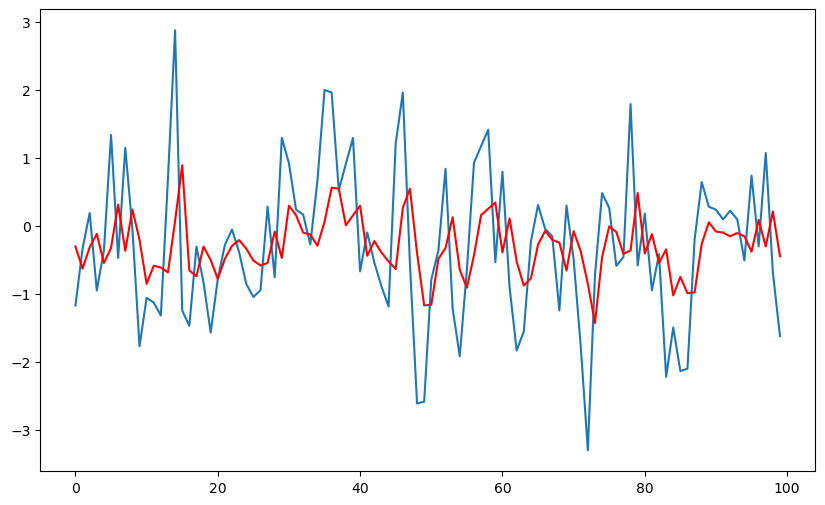

In [6]:
# Entrenamos el modelo
model = ARIMA(AR1, order=(p, 0, 0))
results_AR1 = model.fit(disp=-1)

# Visualizamos las predicciones vs la serie original
plt.figure(figsize=[10, 6])
plt.plot(AR1)
plt.plot(results_AR1.fittedvalues, '-r')

# Métrica
rmse = sqrt(mean_squared_error(AR1, results_AR1.fittedvalues))
print("RMSE:", np.round(rmse, 3))

### Simulamos un proceso AR de Orden 1

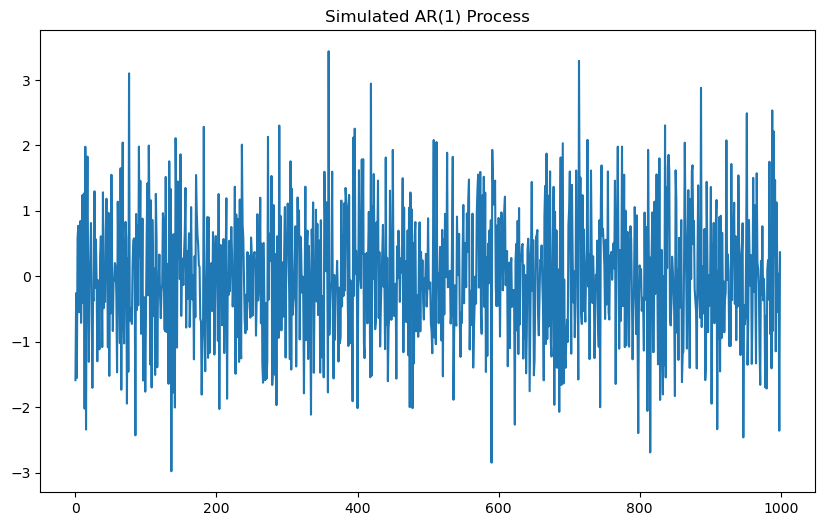

In [7]:
# Simulamos un proceso autorregresivo de orden 1
ar1 = np.array([1, 0.3])
P = len(ar1)-1
N_SAMPLES = 1000

simulated_AR1 = ArmaProcess(ar=ar1).generate_sample(nsample=N_SAMPLES)

# Visualizamos el proceso autorregresivo de orden 1
plt.figure(figsize=[10, 6])
plt.plot(simulated_AR1)
plt.title("Simulated AR(1) Process")
plt.show()

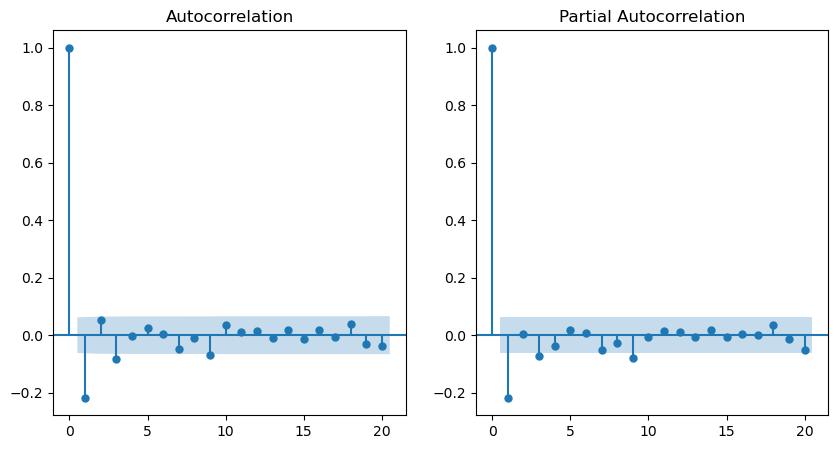

In [8]:
# Visualizamos las autocorrelaciones
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(simulated_AR1, lags=20, ax=ax[0])
plot_pacf(simulated_AR1, lags=20, ax=ax[1])
plt.show()

In [9]:
# Vemos en la autocorrelacion parcial el orden interesante
pacf_coef = pacf(simulated_AR1)
print(pacf_coef)

[ 1.00000000e+00 -2.18022245e-01  5.07410693e-03 -7.26501676e-02
 -3.80435011e-02  1.94114952e-02  8.02315310e-03 -5.14814754e-02
 -2.76599893e-02 -7.94693740e-02 -5.06456624e-03  1.50232667e-02
  9.37101190e-03 -7.15765232e-03  1.93588549e-02 -6.56183781e-03
  4.35195333e-03  2.72812767e-04  3.66946613e-02 -1.26150639e-02
 -5.06558868e-02  1.61566520e-02 -1.96681982e-02  4.09034022e-02
  4.46429751e-02  4.68091583e-03 -1.25501146e-02  2.29229357e-02
  1.26561941e-02 -5.99880924e-03 -6.87165803e-02  4.71658737e-02
 -1.72539089e-02 -2.28551443e-02 -3.25496990e-02  4.16282339e-03
 -4.85048552e-02 -3.80949516e-02  1.47897600e-02  2.05008013e-02
 -1.45398498e-03]


In [10]:
# Sacamos los coeficientes Yule Walker
rho, sigma = yule_walker(simulated_AR1, p)
for i in range (len(rho)):
    print('El coeficiente Rho ' +str(i+1) + ': ' + str(-np.round(rho[i], 3)))
print('El coeficiente Sigma (ruido): ' + str(np.round(sigma, 3)))

El coeficiente Rho 1: 0.218
El coeficiente Sigma (ruido): 0.974


RMSE: 0.974


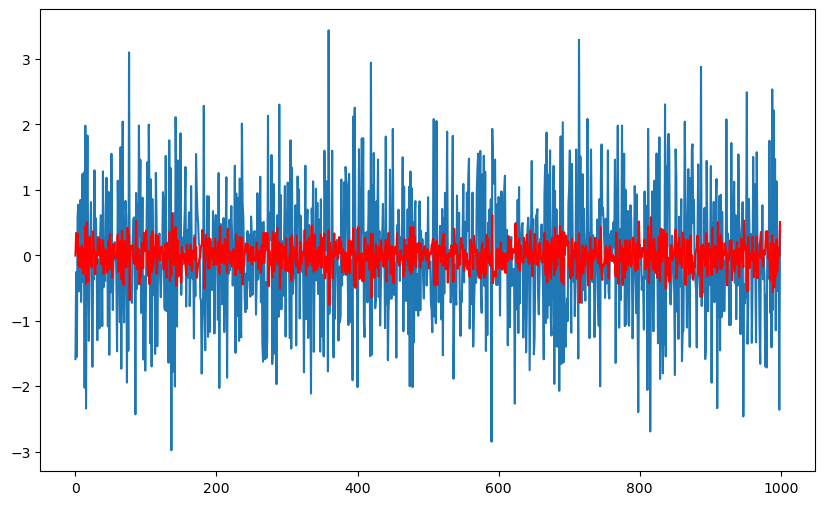

In [11]:
# Entrenamos el modelo
model = ARIMA(simulated_AR1, order=(p, 0, 0))
results_AR1 = model.fit(disp=-1)

# Visualizamos las predicciones vs la serie original
plt.figure(figsize=[10, 6])
plt.plot(simulated_AR1)
plt.plot(results_AR1.fittedvalues, '-r')

# Métrica
rmse = sqrt(mean_squared_error(simulated_AR1, results_AR1.fittedvalues))
print("RMSE:", np.round(rmse, 3))

### Simulamos un proceso AR de Orden 2

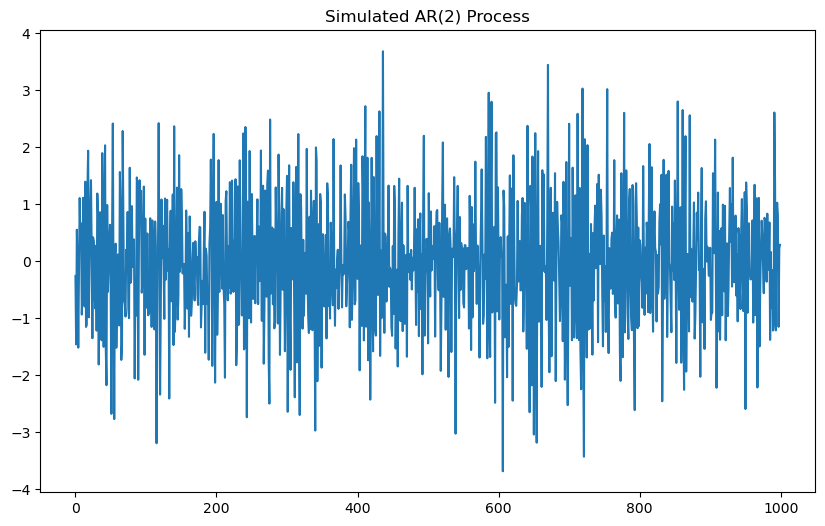

In [12]:
# Simulamos un proceso autorregresivo de orden 2
ar2 = np.array([1, 0.3, 0.5])
p = len(ar2)-1
N_SAMPLES = 1000

simulated_AR2 = ArmaProcess(ar=ar2).generate_sample(nsample=N_SAMPLES)

# Visualizamos el proceso autorregresivo de orden 2
plt.figure(figsize=[10, 6])
plt.plot(simulated_AR2)
plt.title("Simulated AR(2) Process")
plt.show()

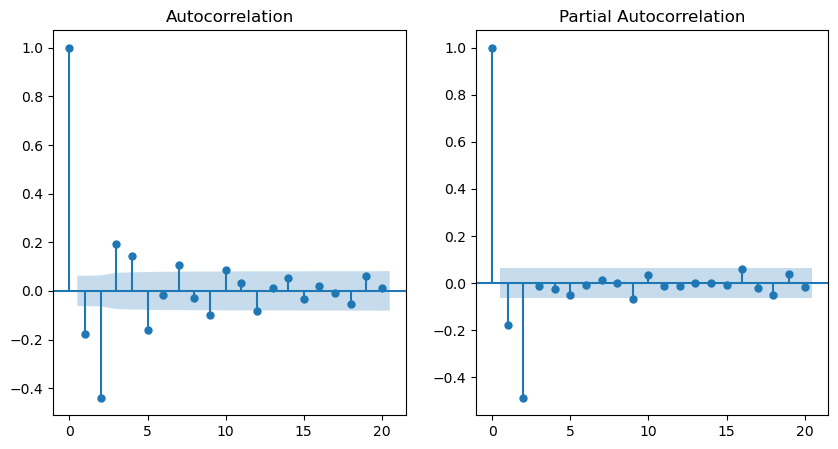

In [13]:
# Visualizamos las autocorrelaciones
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(simulated_AR2, lags=20, ax=ax[0])
plot_pacf(simulated_AR2, lags=20, ax=ax[1])
plt.show()

In [14]:
# Vemos en la autocorrelacion parcial el orden interesante
pacf_coef = pacf(simulated_AR2)
print(pacf_coef)

[ 1.         -0.17798697 -0.48761141 -0.01196541 -0.0272344  -0.05152591
 -0.00722155  0.01473806  0.00160144 -0.06592701  0.03384457 -0.01068471
 -0.01412584 -0.00164324  0.00190985 -0.00679238  0.05789316 -0.02156481
 -0.04892828  0.03975336 -0.01710009 -0.04353499  0.04654501  0.00887954
 -0.02772054  0.0506571  -0.07641493 -0.01825324 -0.00912539 -0.06176931
 -0.01864381 -0.02132369  0.02055414 -0.01435498 -0.00593156  0.02055763
  0.03208597 -0.01519008 -0.03240534 -0.07205675 -0.01455115]


In [15]:
# Sacamos los coeficientes Yule Walker
rho, sigma = yule_walker(simulated_AR2, p)
for i in range (len(rho)):
    print('El coeficiente Rho ' +str(i+1) + ': ' + str(-np.round(rho[i], 3)))
print('El coeficiente Sigma (ruido): ' + str(np.round(sigma, 3)))

El coeficiente Rho 1: 0.265
El coeficiente Rho 2: 0.488
El coeficiente Sigma (ruido): 0.971


RMSE: 0.972


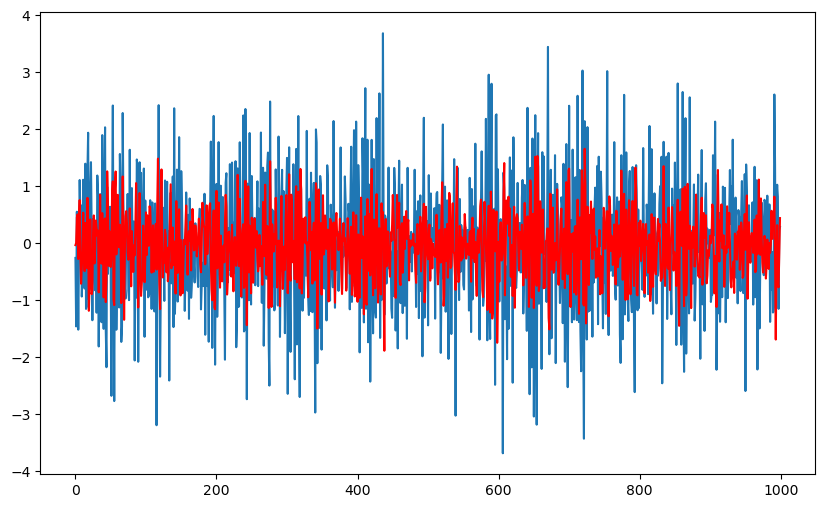

In [16]:
# Entrenamos el modelo
model = ARIMA(simulated_AR2, order=(p, 0, 0))
results_AR2 = model.fit(disp=-1)

# Visualizamos las predicciones vs la serie original
plt.figure(figsize=[10, 6])
plt.plot(simulated_AR2)
plt.plot(results_AR2.fittedvalues, '-r')

# Métrica
rmse = sqrt(mean_squared_error(simulated_AR2, results_AR2.fittedvalues))
print("RMSE:", np.round(rmse, 3))

### Simulamos un proceso AR de Orden 3

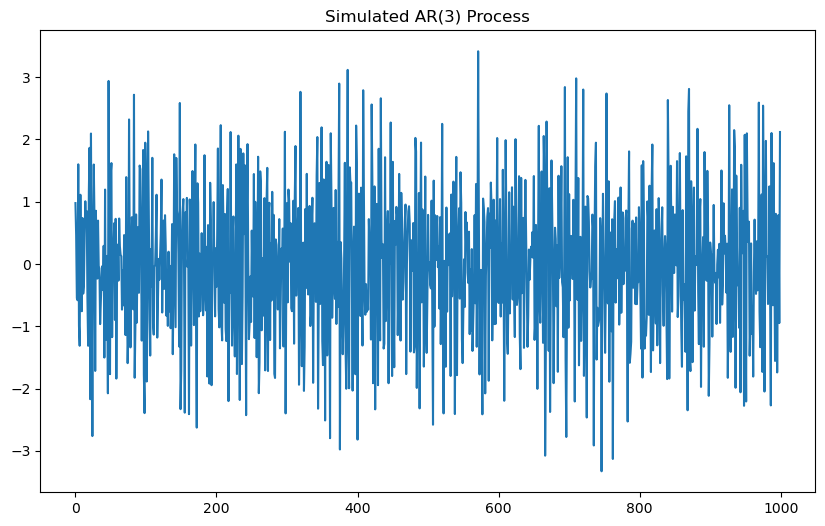

In [17]:
# Simulamos un proceso autorregresivo de orden 3
ar3 = np.array([1, 0.3, 0.5, 0.1])
p = len(ar3)-1
N_SAMPLES = 1000

simulated_AR3 = ArmaProcess(ar=ar3).generate_sample(nsample=N_SAMPLES)

# Visualizamos el proceso autorregresivo de orden 3
plt.figure(figsize=[10, 6])
plt.plot(simulated_AR3)
plt.title("Simulated AR(3) Process")
plt.show()

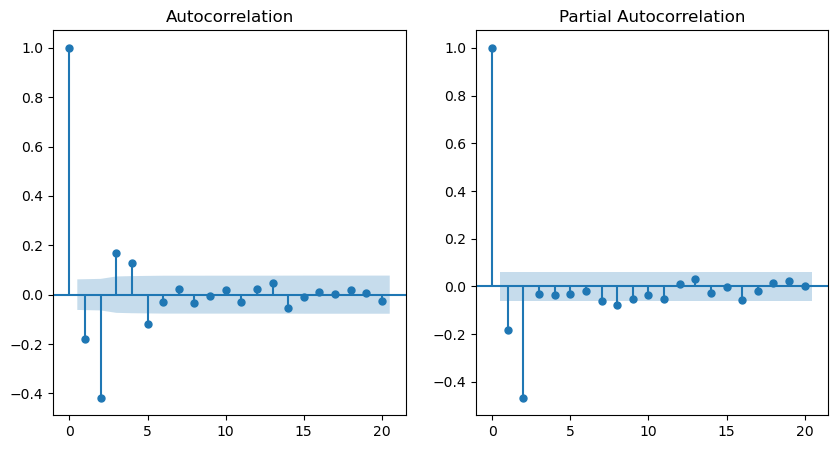

In [18]:
# Visualizamos las autocorrelaciones
fig, ax = plt.subplots(1,2,figsize=(10,5))
plot_acf(simulated_AR3, lags=20, ax=ax[0])
plot_pacf(simulated_AR3, lags=20, ax=ax[1])
plt.show()

In [19]:
# Vemos en la autocorrelacion parcial el orden interesante
pacf_coef = pacf(simulated_AR3)
print(pacf_coef)

[ 1.00000000e+00 -1.80578402e-01 -4.66353976e-01 -3.18913751e-02
 -3.74806530e-02 -3.14503151e-02 -1.98147034e-02 -5.96757469e-02
 -7.56001444e-02 -5.08475062e-02 -3.51361030e-02 -5.31964136e-02
  8.37207257e-03  3.15205522e-02 -2.75245442e-02 -2.56978959e-03
 -5.50024181e-02 -1.71527977e-02  1.40646389e-02  2.29856247e-02
  3.62882250e-03 -6.01589363e-02 -4.19797254e-04 -1.83667417e-02
 -5.74930999e-02 -1.52095139e-02  1.76011539e-02  5.11753990e-02
  1.51829614e-02  2.14049838e-02 -5.31211564e-02 -1.38603898e-02
  4.68492796e-04 -3.25115154e-02  6.59148651e-03 -1.71253623e-02
 -8.77073127e-03  5.28079676e-04  9.29083087e-04  3.43763259e-03
  3.50519979e-02]


In [20]:
# Sacamos los coeficientes Yule Walker
rho, sigma = yule_walker(simulated_AR3, p)
for i in range (len(rho)):
    print('El coeficiente Rho ' +str(i+1) + ': ' + str(-np.round(rho[i], 3)))
print('El coeficiente Sigma (ruido): ' + str(np.round(sigma, 3)))

El coeficiente Rho 1: 0.28
El coeficiente Rho 2: 0.475
El coeficiente Rho 3: 0.032
El coeficiente Sigma (ruido): 1.02


RMSE: 1.02


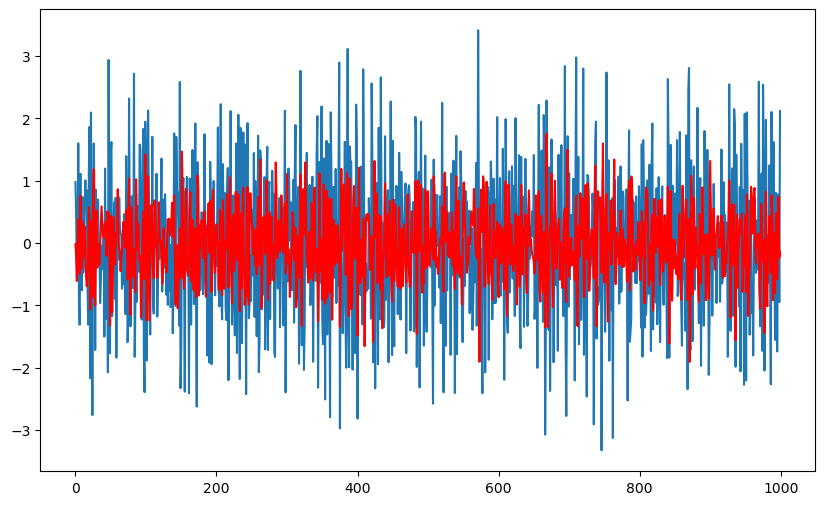

In [21]:
# Entrenamos el modelo
model = ARIMA(simulated_AR3, order=(p, 0, 0))
results_AR3 = model.fit(disp=-1)

# Visualizamos las predicciones vs la serie original
plt.figure(figsize=[10, 6])
plt.plot(simulated_AR3)
plt.plot(results_AR3.fittedvalues, '-r')

# Métrica
rmse = sqrt(mean_squared_error(simulated_AR3, results_AR3.fittedvalues))
print("RMSE:", np.round(rmse, 3))